In [420]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

lpi = pd.read_csv("cleaned/lpi.csv")
sdg_eleven = pd.read_csv("cleaned/sdg_eleven.csv")
sdg_nine = pd.read_csv("cleaned/sdg_nine.csv")
sdg_seven = pd.read_csv("cleaned/sdg_seven.csv")
wdi = pd.read_csv("cleaned/wdi.csv")
indicators = pd.read_csv("cleaned/inter_ind_data.csv")
gdp = pd.read_csv("cleaned/country_gdp.csv")



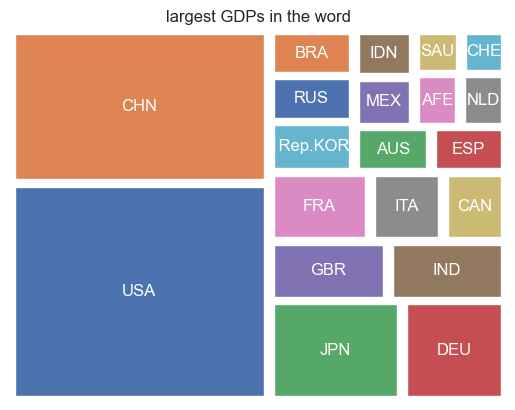

In [400]:
gdp = gdp.sort_values(by="2020",ascending=False)[0:20]

squarify.plot(sizes=gdp["2020"],label=gdp["Country Code"],pad = 2,color=sns.color_palette("deep",10),text_kwargs={"color":"white"})
plt.axis('off')
plt.title("largest GDPs in the word")
plt.show()

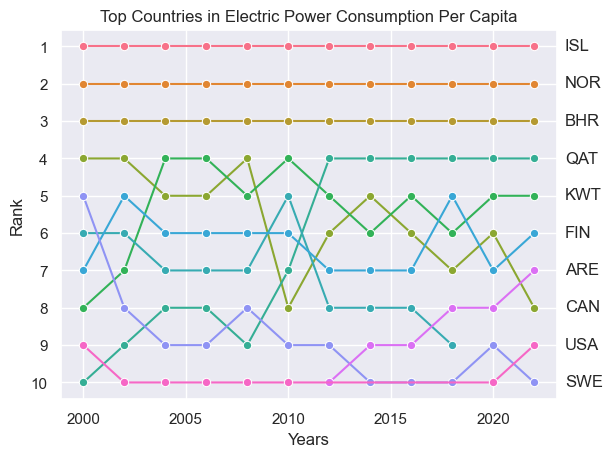

In [402]:
wdi = wdi[(wdi["Series Name"] == "Electric power consumption (kWh per capita)") & (wdi["Years"] % 2 == 0) & (wdi["Years"] >= 2000)]
wdi["Rank"] = wdi.groupby("Years")["Values"].rank(method="first",ascending=False)
wdi = wdi[wdi["Rank"] <= 10].sort_values(by="Rank",ascending=True)
label_countries = wdi[wdi["Years"] == 2022]

sns.lineplot(data=wdi,x="Years",y="Rank",hue="Country Name",marker="o")
plt.gca().invert_yaxis()
plt.title("Top Countries in Electric Power Consumption Per Capita")
plt.yticks([n for n in range(1,11)])
plt.ylabel("Rank")
plt.legend([],[],frameon=False)
for index,row in label_countries.iterrows():
    plt.text(row["Years"] + 1.5,row["Rank"]+0.1,row["Country Code"])
plt.show()



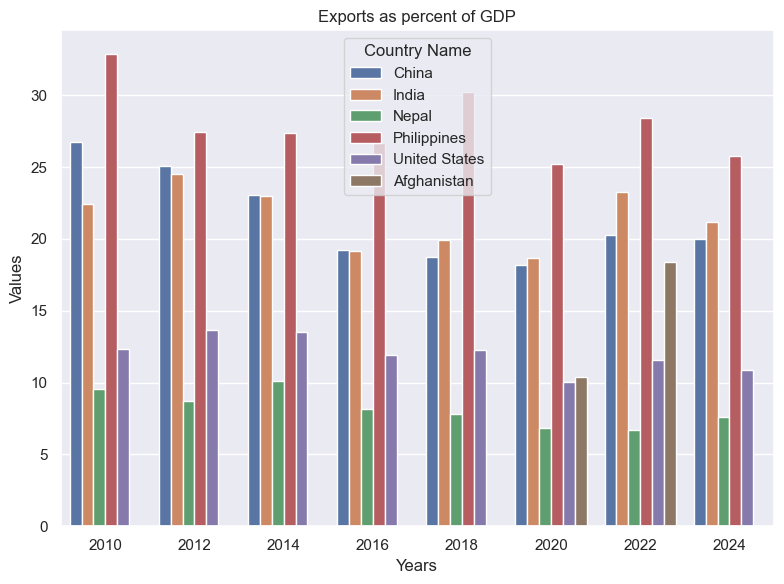

In [404]:
indicators = indicators[(indicators["Series Name"] == "Exports of goods and services (% of GDP)") & (indicators["Years"] >= 2010) & (indicators["Years"] % 2 == 0)]
indicators = indicators[indicators["Country Name"].isin(["Philippines", "India", "China", "United States", "Nepal", "Afghanistan"])]

sns.barplot(data=indicators,x="Years",y="Values",hue="Country Name")
plt.gcf().set_size_inches(8, 6)
plt.title("Exports as percent of GDP")
plt.tight_layout()
plt.show()

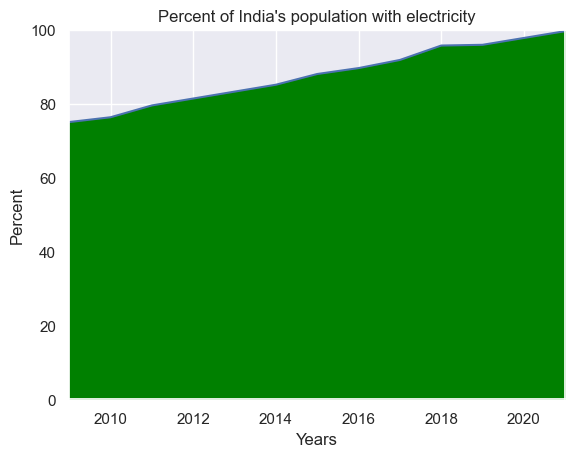

In [406]:
sdg_seven = sdg_seven[(sdg_seven["SeriesDescription"] == "Proportion of population with access to electricity, by urban/rural (%)") & (sdg_seven["TimePeriod"] >= 2000) & (sdg_seven["Location"] == "ALLAREA")]


sdg_seven = sdg_seven[sdg_seven["GeoAreaName"] == "India"]
x = sdg_seven["TimePeriod"].to_numpy()
y = sdg_seven["Value"].to_numpy()

sns.set_theme()

plt.plot(sdg_seven["TimePeriod"],sdg_seven["Value"])
plt.fill_between(x, y, color="green")
plt.ylim(0,100)
plt.xlim(2009,2021)
plt.xlabel("Years")
plt.ylabel("Percent")
plt.title("Percent of India's population with electricity")
plt.show()

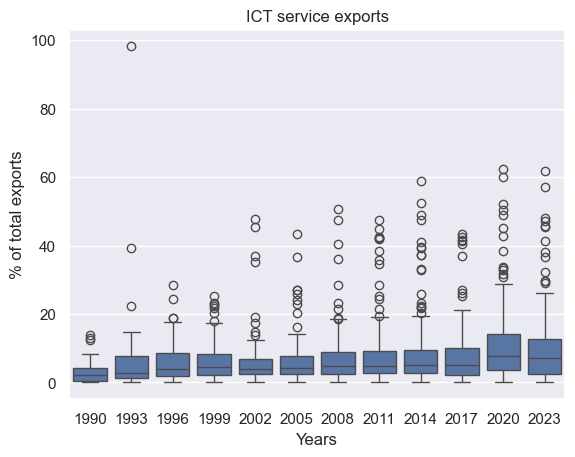

In [408]:
indicators = indicators[(indicators["Series Name"] == "ICT service exports (% of service exports, BoP)") & (indicators["Years"] >= 1990) & (indicators["Years"] % 3 == 1)]

sns.boxplot(data=indicators, x="Years", y='Values')
plt.xlabel('Years')
plt.ylabel('% of total exports')
plt.title('ICT service exports')
plt.show()

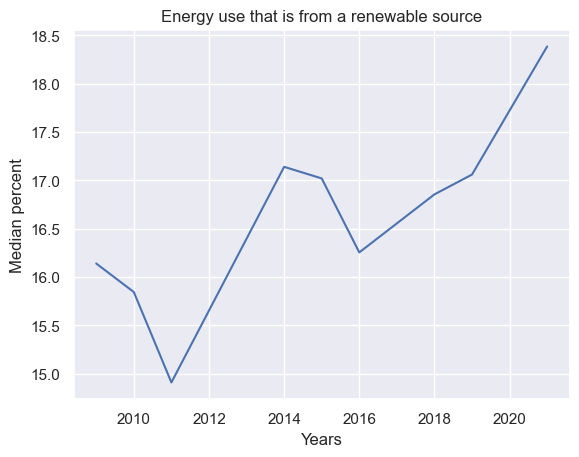

In [410]:
sdg_seven = sdg_seven[(sdg_seven["SeriesDescription"] == "Renewable energy share in the total final energy consumption (%)") & (sdg_seven["TimePeriod"] >= 2000)]
sdg_seven = sdg_seven.groupby("TimePeriod")[["Value"]].median()

sns.lineplot(data=sdg_seven,x='TimePeriod',y="Value")
plt.title("Energy use that is from a renewable source")
plt.xlabel("Years")
plt.ylabel("Median percent")
plt.show()

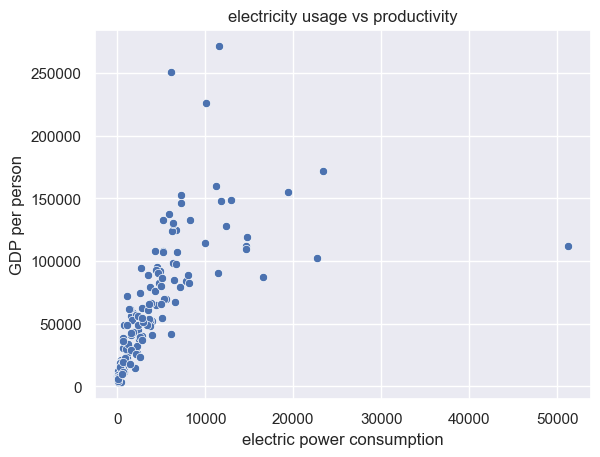

In [412]:
wdi = wdi[(wdi["Series Name"] == "Electric power consumption (kWh per capita)") & (wdi["Years"] == 2022)]
indicators = indicators[(indicators["Series Name"] == "GDP per person employed (constant 2021 PPP $)") & (indicators["Years"] == 2022)]

df = pd.merge(wdi, indicators, on='Country Name', how='inner')

sns.scatterplot(data=df,x="Values_x",y="Values_y")
plt.title('electricity usage vs productivity')
plt.xlabel('electric power consumption')
plt.ylabel('GDP per person')
plt.show()

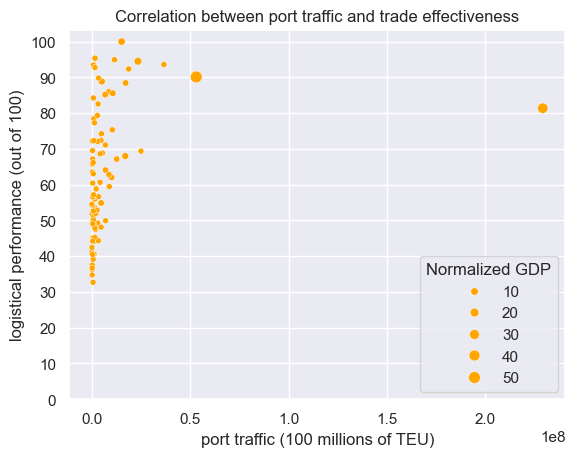

In [421]:
lpi = lpi[(lpi["Series Name"] == "Logistics performance index: Percent of highest performer") & (lpi["Years"] == 2018)]
sdg_nine = sdg_nine[(sdg_nine["SeriesDescription"] == "Container port traffic, maritime transport (twenty-foot equivalent units - TEUs)") & (sdg_nine["TimePeriod"] == 2018)]
sdg_nine = sdg_nine.rename(columns={'GeoAreaName':"Country Name"})

min_val = gdp['2020'].min()
max_val = gdp['2020'].max()
gdp['2020'] = (50 * (gdp['2020'] - min_val)) / (max_val - min_val)

df = pd.merge(lpi,sdg_nine,on='Country Name',how="inner")
df = pd.merge(df,gdp,on="Country Name",how="inner")

sns.scatterplot(data=df, x="Value", y="Values", size="2020",color="orange")
plt.title("Correlation between port traffic and trade effectiveness")
plt.xlabel("port traffic (100 millions of TEU)")
plt.ylabel("logistical performance (out of 100)")
plt.yticks([n for n in range(0,110,10)])
plt.legend(title = "Normalized GDP")
plt.show()



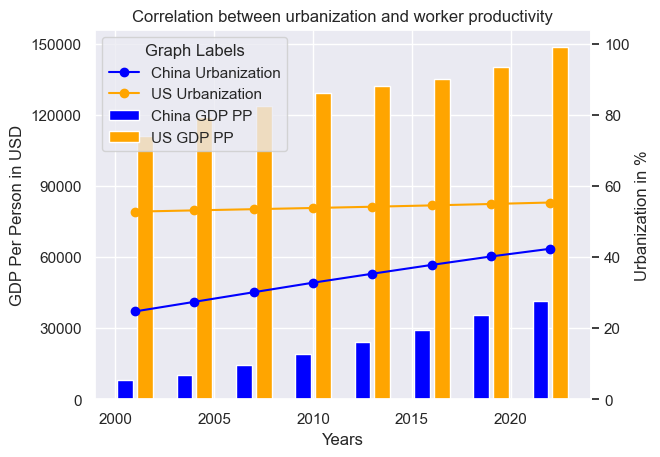

In [416]:
df = indicators[(indicators["Series Name"].isin(["Urban population (% of total population)","GDP per person employed (constant 2021 PPP $)"])) & (indicators["Years"] >= 2001) & (indicators["Years"] % 3 == 0)]
df = df[df["Country Name"].isin(['China','United States'])]
urban_pop = df[df["Series Name"] == "Urban population (% of total population)"]["Values"].to_numpy()
gdp_pp = df[df["Series Name"] == "GDP per person employed (constant 2021 PPP $)"]["Values"].to_numpy()

def forward(y):
    return y / 1500
def backward(y):
    return y * 1000

df = df[df["Series Name"] == "Urban population (% of total population)"]
df = df.drop(columns="Series Name")
df["urban_pop"] = urban_pop
df["gdp_pp"] = gdp_pp
china = df[df["Country Name"] == "China"]
US = df[df["Country Name"] == "United States"]

fig, ax1 = plt.subplots()
ax2 = ax1.secondary_yaxis("right",functions=(forward, backward))
ax1.set_xlabel("Years")

ax1.bar(china["Years"]-0.5,china["gdp_pp"], color="blue", label="China GDP")
ax1.bar(US["Years"]+0.5,US["gdp_pp"], color="orange",  label="US GDP")
ax1.set_ylabel("GDP Per Person in USD")
ax1.set_yticks([0,30000,60000,90000,120000,150000])

ax1.plot(china["Years"],backward(china["urban_pop"].to_numpy()), color='blue', marker="o", label="China Urbanization")
ax1.plot(US["Years"],backward(US["urban_pop"].to_numpy()), color="orange", marker="o", label="US Urbanization")

ax2.set_ylabel("Urbanization in %")
plt.title("Correlation between urbanization and worker productivity")
ax1.legend(["China Urbanization","US Urbanization","China GDP PP","US GDP PP"],loc="upper left",title="Graph Labels")
plt.show()

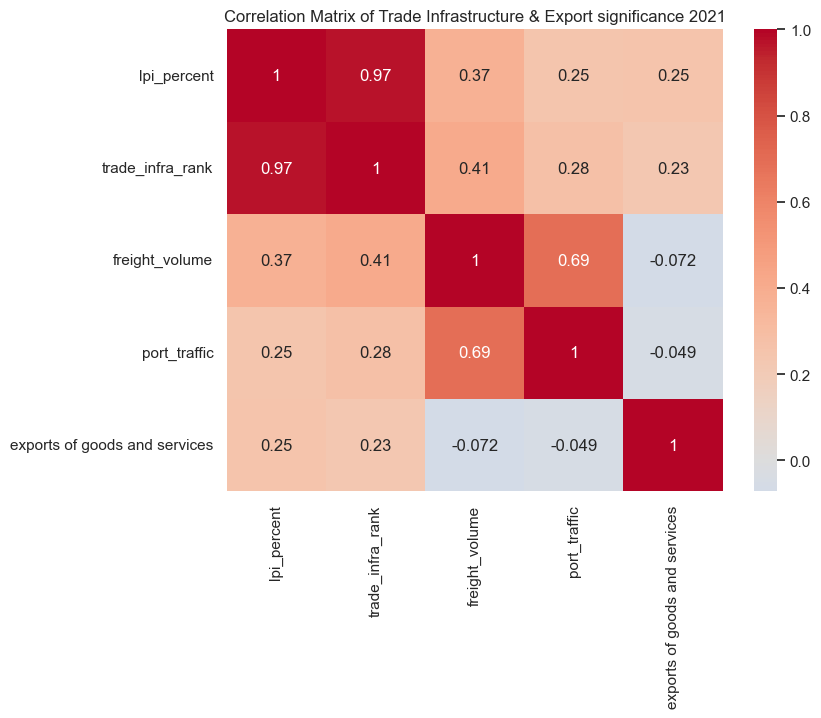

In [418]:
lpi = lpi[(lpi["Years"] == 2018)]
sdg_nine = sdg_nine[(sdg_nine["SeriesDescription"].isin(["Container port traffic, maritime transport (twenty-foot equivalent units - TEUs)","Freight volume, by mode of transport (tonne kilometres)"])) & (sdg_nine["TimePeriod"] == 2021)]
indicators = indicators[(indicators["Series Name"] == "Exports of goods and services (% of GDP)") & (indicators["Years"] == 2021)]
sdg_nine = sdg_nine.rename(columns={'GeoAreaName':"Country Name"})


lpi_percent = lpi[lpi["Series Name"] == "Logistics performance index: Percent of highest performer"]["Values"].to_numpy()
trade_infra_rank = lpi[lpi["Series Name"] == "Quality of trade- and transport-related infrastructure, score (1=low to 5=high)"]["Values"].to_numpy()
lpi = lpi[lpi["Series Name"] == "Logistics performance index: Percent of highest performer"]
lpi = lpi.drop(columns="Series Name")
lpi["lpi_percent"] = lpi_percent
lpi["trade_infra_rank"] = trade_infra_rank

freight_volume = sdg_nine[sdg_nine["SeriesDescription"] == 'Freight volume, by mode of transport (tonne kilometres)'][["Value","Country Name"]]
port_traffic = sdg_nine[sdg_nine["SeriesDescription"] == 'Container port traffic, maritime transport (twenty-foot equivalent units - TEUs)'][["Value","Country Name"]]
sdg_nine = sdg_nine.drop_duplicates(subset=['TimePeriod', 'Country Name'])
sdg_nine = sdg_nine.drop(columns=["SeriesDescription",'Mode of transportation',"Location","Units","Value"])
sdg_nine = pd.merge(sdg_nine,freight_volume,on='Country Name',how="inner")
sdg_nine = sdg_nine.rename(columns={'Value':"freight_volume"})
sdg_nine = pd.merge(sdg_nine,port_traffic,on='Country Name',how="inner")
sdg_nine = sdg_nine.rename(columns={'Value':"port_traffic"})

indicators = indicators.rename(columns={'Values':"exports of goods and services"})
indicators = indicators.drop(columns=["Series Name","Country Code"])


df = pd.merge(lpi,sdg_nine,on='Country Name',how="inner")
df = pd.merge(df,indicators,on="Country Name",how="inner")

correlation_matrix = df[["lpi_percent","trade_infra_rank","freight_volume","port_traffic","exports of goods and services"]]
correlation_matrix = correlation_matrix.corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix of Trade Infrastructure & Export significance 2021")
plt.show()